In [331]:
from utils.file_handling import *
from utils.misc import *
from utils.matplot_handlers import *
from utils.visualizers import *
from segmentation.composite_action_extractor import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Entropy Parameters
csv_file_name = 'Cartpole'
# csv_file_name = 'Mountaincar'
# csv_file_name = 'Pendulum'
# csv_file_name = 'Acrobot'
episodes = -3
analysis_method = 'w'

# Read in entropy csv
base_path = get_absolute_path('data', directory_file_hint=csv_file_name.lower(), ignore_files=False)
csv_path = os.path.join(base_path, 'state_action_data.csv')

pre_data = pd.read_csv(csv_path, index_col=None)
selected_episodes = pre_data['episode'].unique()  # Either do [some index] or [:]
selected_episodes = [selected_episodes] if np.isscalar(selected_episodes) else selected_episodes
data_df = pre_data[pre_data['episode'].isin(selected_episodes)]
data_df_episodes = [data_df[data_df['episode'] == episode].copy() for episode in selected_episodes]

In [332]:
selected_episodes

array([ 15,  51,  84, 114, 119, 121, 123, 124, 130, 450])

In [333]:
main_df = data_df_episodes[episodes]

In [334]:
main_df

,index,step,action_values_0,state_values,episode
641,0,0,0.0,"[0.007387133887476407, -0.2429888423990633, 0....",130
642,1,1,1.0,"[0.0025273570394951416, -0.04809819008381325, ...",130
643,2,2,1.0,"[0.0015653932378188766, 0.14670525857247452, 0...",130
644,3,3,1.0,"[0.004499498409268367, 0.3415100440161402, 0.0...",130
645,4,4,1.0,"[0.01132969928959117, 0.5364028134572316, 0.00...",130
646,5,5,0.0,"[0.022057755558735806, 0.3412174499414795, -0....",130
647,6,6,0.0,"[0.028882104557565395, 0.1462727860755501, -0....",130
648,7,7,1.0,"[0.0318075602790764, 0.3417254097829821, -0.02...",130
649,8,8,0.0,"[0.038642068474736044, 0.1470254379990136, -0....",130
650,9,9,0.0,"[0.04158257723471632, -0.04749253264783959, -0...",130


In [335]:
with open(os.path.join(base_path, 'video.pkl'), 'rb') as f:
    video_path = pickle.load(f)
video = video_path[selected_episodes[episodes]][0]

In [336]:
composite_actions, info = CompositeActionExtractor.get_composite_actions(dataframe=main_df, analysis_method=analysis_method, 
                                                            window_size=5)

Text(0.5, 1.0, 'Action Values for Cartpole')

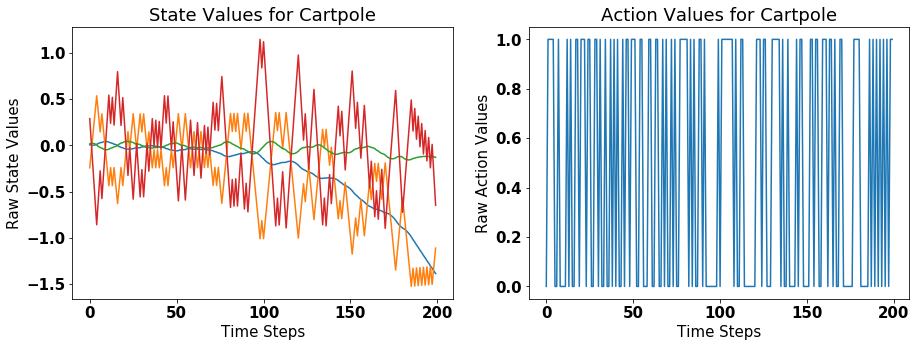

In [337]:
matplotlib.rcParams['figure.figsize'] = [15, 5]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)


plt.subplot(121)
plt.plot(info['state'])
plt.ylabel('Raw State Values')
plt.xlabel('Time Steps')
plt.title(f'State Values for {csv_file_name}')
plt.subplot(122)
plt.plot(info['actions'])
plt.ylabel('Raw Action Values')
plt.xlabel('Time Steps')
plt.title(f'Action Values for {csv_file_name}')

Text(0.5, 1.0, 'Action Measurements for Cartpole EM')

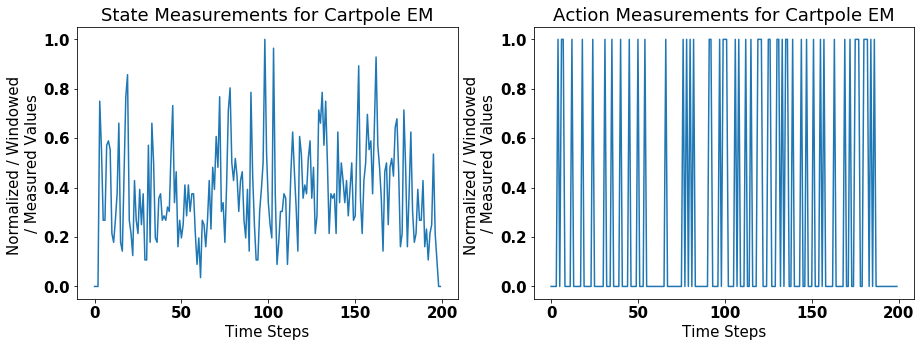

In [338]:
matplotlib.rcParams['figure.figsize'] = [15, 5]
plt.subplot(121)
plt.plot(info['state_analyzed_norm'])
plt.ylabel('Normalized / Windowed \n/ Measured Values')
plt.xlabel('Time Steps')
plt.title(f'State Measurements for {csv_file_name} EM')#using {analysis_method}')
plt.subplot(122)
plt.plot(info['action_analyzed_norm'])
plt.ylabel('Normalized / Windowed \n/ Measured Values')
plt.xlabel('Time Steps')
plt.title(f'Action Measurements for {csv_file_name} EM')#using {analysis_method}')

Text(0.5, 1.0, 'Action Threshed Measurements for \nCartpole using w')

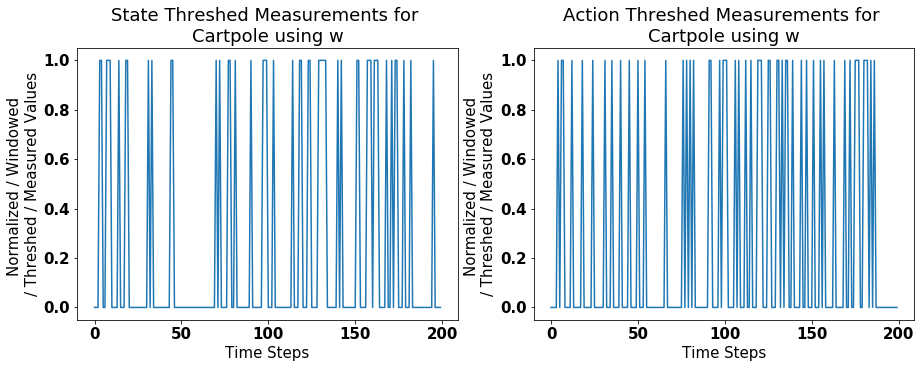

In [339]:
matplotlib.rcParams['figure.figsize'] = [15, 5]
plt.subplot(121)
plt.plot(info['state_analyzed_binary'])
plt.ylabel('Normalized / Windowed \n/ Threshed / Measured Values')
plt.xlabel('Time Steps')
plt.title(f'State Threshed Measurements for \n{csv_file_name} using {analysis_method}')
plt.subplot(122)
plt.plot(info['action_analyzed_binary'])
plt.ylabel('Normalized / Windowed \n/ Threshed / Measured Values')
plt.xlabel('Time Steps')
plt.title(f'Action Threshed Measurements for \n{csv_file_name} using {analysis_method}')

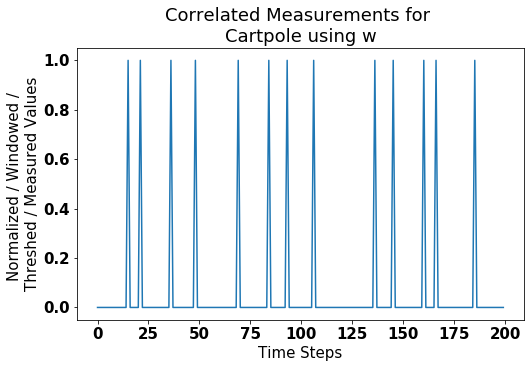

In [340]:
matplotlib.rcParams['figure.figsize'] = [8, 5]
for key in info['index_groups']:
    plt.subplot(1,len(info['index_groups']),1)
    plt.plot(info['index_groups'][key])
    plt.ylabel('Normalized / Windowed / \nThreshed / Measured Values')
    plt.xlabel('Time Steps')
    plt.title(f'Correlated Measurements for \n{csv_file_name} using {analysis_method}')

Text(0.5, 0, 'Time Steps')

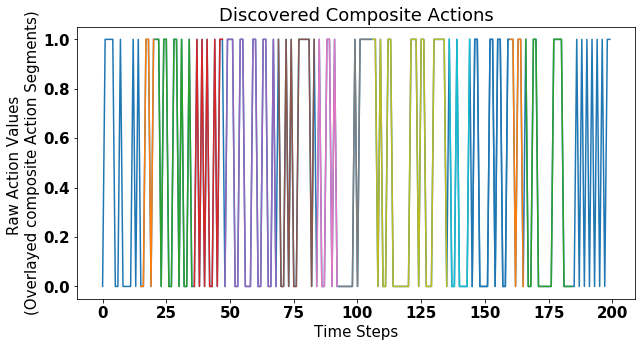

In [341]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
plt.plot(info['actions'])
for action in composite_actions:
    for i, segment in enumerate(composite_actions[action]):
        plt.plot(segment, label=f'composite Action {action} segment #{i}')

plt.title('Discovered Composite Actions')
plt.ylabel('Raw Action Values \n(Overlayed composite Action Segments)')
plt.xlabel('Time Steps')
# plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")

In [342]:
from ipywidgets import FloatSlider, IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual

def f(i):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,2,1)
    plt.imshow(video[i])
    plt.subplot(1,2,2)
    plt.subplots_adjust(right=1.5)
    plt.plot(info['index_groups'][0], markevery=[i], marker='|', markeredgecolor='r', 
             markersize=40, mew=4)
    plt.ylabel('Normalized / Windowed / \nThreshed / Measured Values')
    plt.xlabel('Time Steps')
    plt.title(f'Correlated Action Joint 0 Measurements for \n{csv_file_name} using {analysis_method}')
    

interact(f,i=IntSlider(min=0, max=video.shape[0]-1, step=1));

interactive(children=(IntSlider(value=0, description='i', max=199), Output()), _dom_classes=('widget-interact'…

In [343]:
## We can take a look at primarily the action with the maximum total entropy
scored_composite_actions = {key: [(seg, info['state_analyzed_norm'][~np.isnan(seg)].max()) for seg in composite_actions[key]] for key in composite_actions}
k = 1
for key in scored_composite_actions:
    scored_composite_actions[key] = list(sorted(scored_composite_actions[key], key=lambda x: x[1], reverse=True))[:k]

In [344]:
isolated_composite_actions = {key: [seg[~np.isnan(seg)] for seg in composite_actions[key]] for key in composite_actions}

In [347]:
from ipywidgets import FloatSlider, IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual

matplotlib.rcParams["figure.facecolor"] = 'white'
def f(i):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,2,1)
    plt.imshow(video[i])
    plt.subplot(1,2,2)
    plt.subplots_adjust(right=1.5)
    plt.plot(info['index_groups'][0], markevery=[i], marker='|', markeredgecolor='r', 
         markersize=40, mew=4)
    plt.plot(scored_composite_actions[0][0][0])
    plt.ylabel('Normalized / Windowed / \nThreshed / Measured Values')
    plt.xlabel('Time Steps')
    plt.title(f'Highest Effective Correlated Action Joint 0 Measurements for \n{csv_file_name} using {analysis_method}')
    

interact(f,i=IntSlider(min=0, max=video.shape[0]-1, step=1));

interactive(children=(IntSlider(value=0, description='i', max=199), Output()), _dom_classes=('widget-interact'…

In [346]:
import pickle

name = os.path.join(base_path, 'segments')
if name[-4:] != ".pkl":
    name += ".pkl"
with open(name, 'wb') as f:
    pickle.dump(isolated_composite_actions, f, pickle.HIGHEST_PROTOCOL)